Import Libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
dfloan = pd.read_csv("loan.csv") #export pdf
dfloan.shape #get the shape of data

C:\Users\jaypa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(39717, 111)

In [155]:
dfloan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [156]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [157]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Observed that some columns we have a no data(we identify that we have 39717 data and some columns has a 39717 null values) so we drop all the columns

In [158]:
dfloan = dfloan.drop(columns=dfloan.loc[:,dfloan.isnull().sum() == 39717].columns)

In [159]:
dfloan.shape

(39717, 57)

In [160]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

we observed that are  url has a same url just change the query string value with member id it givies nothing new information so we can drop url column also

In [161]:
dfloan = dfloan.drop(columns=['url'])
dfloan.shape

(39717, 56)

desc columns has a large number of null data and we have a same type information on purpose very filter way so we can drop desc column

In [162]:
dfloan = dfloan.drop(columns=['desc'])

In [163]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record      

In [164]:
dfloan.shape

(39717, 55)

We can not predict anyones employee title and emplength so we drop null rows

In [165]:
dfloan = dfloan[~dfloan.emp_title.isnull()]
dfloan = dfloan[~dfloan.emp_length.isnull()]
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             9
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        24018
mths_since_last_record      

in mths_since_last_delinq, mths_since_last_record we can replace drop

In [166]:
dfloan = dfloan.drop(columns=['mths_since_last_delinq'])
dfloan = dfloan.drop(columns=['mths_since_last_record'])
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             9
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                     

We can replace null values in revol_util by avg but before that we convert into the float

In [167]:
dfloan.shape

(37202, 53)

In [168]:
dfloan["revol_util"] = dfloan["revol_util"].str.replace('%','')
dfloan["revol_util"]  = dfloan["revol_util"].astype("float64")

In [169]:
dfloan["revol_util"] = dfloan["revol_util"].fillna(np.round(dfloan["revol_util"].mean(), 2))

In [170]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             9
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                     

we dont find any row to fill null values of last payment date so we can drop null rows

In [171]:
dfloan.shape

(37202, 53)

In [172]:
dfloan = dfloan[~dfloan.last_pymnt_d.isnull()]
dfloan.shape

(37138, 53)

In [173]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             9
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                     

In [174]:
dfloan.collections_12_mths_ex_med.value_counts()

0.0    37091
Name: collections_12_mths_ex_med, dtype: int64

In [175]:
dfloan.chargeoff_within_12_mths.value_counts()

0.0    37091
Name: chargeoff_within_12_mths, dtype: int64

here all the values with zero then we replace null value with zero

In [176]:
dfloan = dfloan.drop(columns=['collections_12_mths_ex_med'])
dfloan = dfloan.drop(columns=['chargeoff_within_12_mths'])
dfloan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                          9
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc 

In [177]:
dfloan.pub_rec_bankruptcies.value_counts()

0.0    34981
1.0     1496
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [178]:
dfloan.tax_liens.value_counts()

0.0    37106
Name: tax_liens, dtype: int64

mazority of the data has zero values so we replace null values with zero in pub_rec_bankruptcies ,tax_liens

In [179]:
dfloan = dfloan.drop(columns=['pub_rec_bankruptcies'])
dfloan = dfloan.drop(columns=['tax_liens'])
dfloan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                          9
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc 

In [180]:
dfloan = dfloan.drop(columns=['next_pymnt_d'])

In [181]:
dfloan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
title                      9
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

In [182]:
dfloan.shape

(37138, 48)

Now we try to correct data types

In [183]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [184]:
dfloan.term.value_counts()

 36 months    27077
 60 months    10061
Name: term, dtype: int64

term should be in int so we remove the month text 

In [185]:
dfloan["term"] = dfloan["term"].str.replace(' months','')
dfloan["term"]  = dfloan["term"].astype("int32")

In [186]:
dfloan.int_rate.head() 

1    15.27%
3    13.49%
4    12.69%
5     7.90%
6    15.96%
Name: int_rate, dtype: object

we remove percentage symbol and we convert into float

In [187]:
dfloan["int_rate"] = dfloan["int_rate"].str.replace('%','')
dfloan["int_rate"]  = dfloan["int_rate"].astype("float32")

In [190]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [202]:
dfloan.grade == dfloan.sub_grade.str[0]   #to check all data is correct or misleading         

1        True
3        True
4        True
5        True
6        True
         ... 
39710    True
39711    True
39712    True
39713    True
39716    True
Length: 37138, dtype: bool

In [201]:
dfloan.shape

(37138, 48)

In [203]:
dfloan.title.value_counts()

Debt Consolidation           2877
Debt Consolidation Loan      1648
Personal Loan                 630
Consolidation                 500
Credit Card Consolidation     340
                             ... 
1970 Dodge Charger              1
Scooter purchase                1
My Low Rate Loan                1
Personal Recovery Loan          1
Chase Refi                      1
Name: title, Length: 18365, dtype: int64

we observe that some data has a same values but diffrent spelling so we can replace them

In [1]:
dfloan["title"].replace("debt consolidation", "Debt Consolidation",inplace=True)
dfloan["title"].replace("Debt consolidation", "Debt Consolidation",inplace=True)
dfloan.title.value_counts()

NameError: name 'dfloan' is not defined

In [205]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [210]:
dfloan.purpose.value_counts()

debt_consolidation    17762
credit_card            4820
other                  3682
home_improvement       2754
major_purchase         2033
small_business         1462
car                    1461
wedding                 905
medical                 644
moving                  540
house                   348
vacation                342
educational             297
renewable_energy         88
Name: purpose, dtype: int64

In [215]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

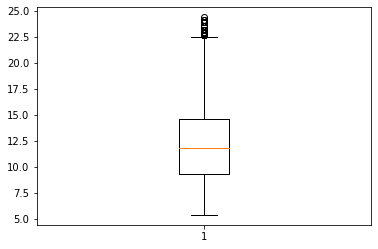

In [218]:
plt.boxplot(dfloan.int_rate)
plt.show()

In [219]:
dfloan.int_rate.describe()

count    37138.000000
mean        12.053769
std          3.716848
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

In [222]:
dfloan.delinq_amnt.value_counts()

0    37138
Name: delinq_amnt, dtype: int64

In [223]:
#drop columns because all column is 0
dfloan = dfloan.drop(columns=['delinq_amnt'])

In [224]:
dfloan.shape

(37138, 47)

Now we remove the outliers

In [228]:
dfloan.int_rate.describe()

count    37138.000000
mean        12.053769
std          3.716848
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

In [229]:
dfloan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq'],
      dtype='object')

In [231]:
dfloan.verification_status.value_counts()

Not Verified       15737
Verified           11936
Source Verified     9465
Name: verification_status, dtype: int64

In [232]:
dfloan.loan_status.value_counts()

Fully Paid     31005
Charged Off     5067
Current         1066
Name: loan_status, dtype: int64

In [233]:
import seaborn as sns

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


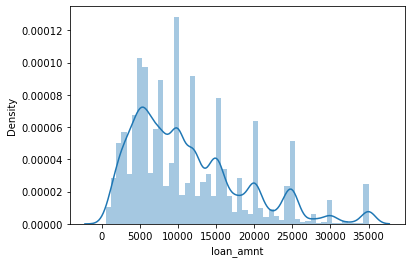

In [235]:
sns.distplot(dfloan.loan_amnt)
plt.show()

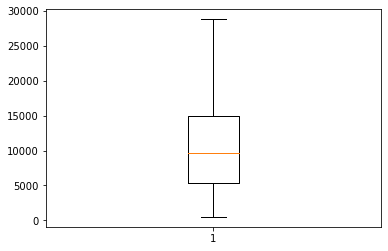

In [245]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           